### Object Identification using Active Contouring

In [112]:
#Based on the following tutorial
#https://www.geeksforgeeks.org/image-segmentation-using-pythons-scikit-image-module/
# Importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import io
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
import os



In [113]:
# Select Sample Image
test_dir = "C:\\Users\\micha\\OneDrive\\Documents\\UniWork\\EE981- Image and Video Processing\\Coursework\\Dataset\\garbage_classification\\test"
#file = "\\battery\\battery143.jpg"
file = "\\brown-glass\\brown-glass315.jpg"
image = io.imread(test_dir + file)
image_gray = rgb2gray(image)
# Applying Gaussian Filter to remove noise
#image_gray_smoothed = gaussian(image_gray, 1)
image_gray_smoothed = image_gray

In [114]:
print(image_gray.shape)

(225, 225)


In [115]:
# Localising the circle's center at 112, 112 with radius 112
x1 = 112 + 112*np.cos(np.linspace(0, 2*np.pi, 500))
x2 = 112 + 112*np.sin(np.linspace(0, 2*np.pi, 500))

In [116]:
# Generating a circle based on x1, x2
snake = np.array([x1, x2]).T

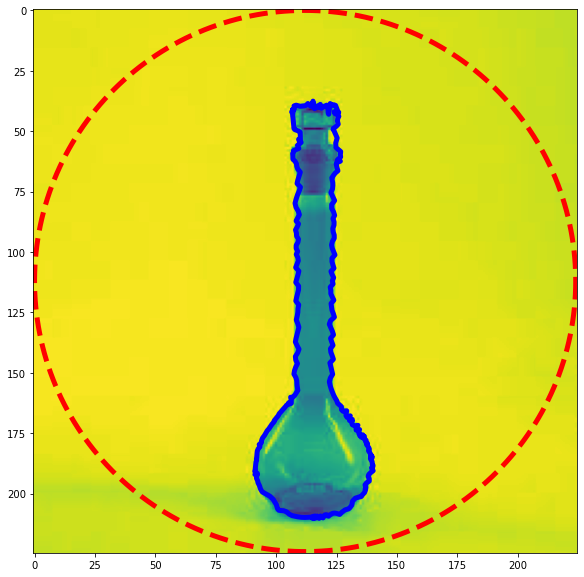

In [117]:
# Computing the Active Contour for the given image
object_snake = active_contour(image_gray_smoothed,snake, alpha=0.1, beta=0.1, w_line=0, w_edge=1, gamma=0.01, max_px_move=1.0, max_iterations=2500, convergence=0.1, boundary_condition='periodic', coordinates='rc')
 
fig = plt.figure(figsize=(10, 10))

# Adding subplots to display the markers
ax = fig.add_subplot(111)
 
# Plotting sample image
ax.imshow(image_gray_smoothed)
 
# Plotting the face boundary marker
ax.plot(object_snake[:, 1],
        object_snake[:, 0],
        '-b', lw=5)
 
# Plotting the circle around face
ax.plot(snake[:, 0], snake[:, 1], '--r', lw=5)